### Model Development, and Evaluation

Below generates synthetic data with a curvilinear relationship (where Linear Regression isn't the best fit) and then plots:

✅ Linear Regression Fit
✅ Residual Plot (to check for patterns)
✅ Distribution Plot (to examine residual normality)
✅ KDE Plot (Kernel Density Estimation of residuals)
✅ MSE Plot (Mean Squared Error for various models)
✅ R² Score Plot (Model performance measure)

This will help visualize why Linear Regression isn't the best fit and why a different model (like Polynomial Regression) may work better.

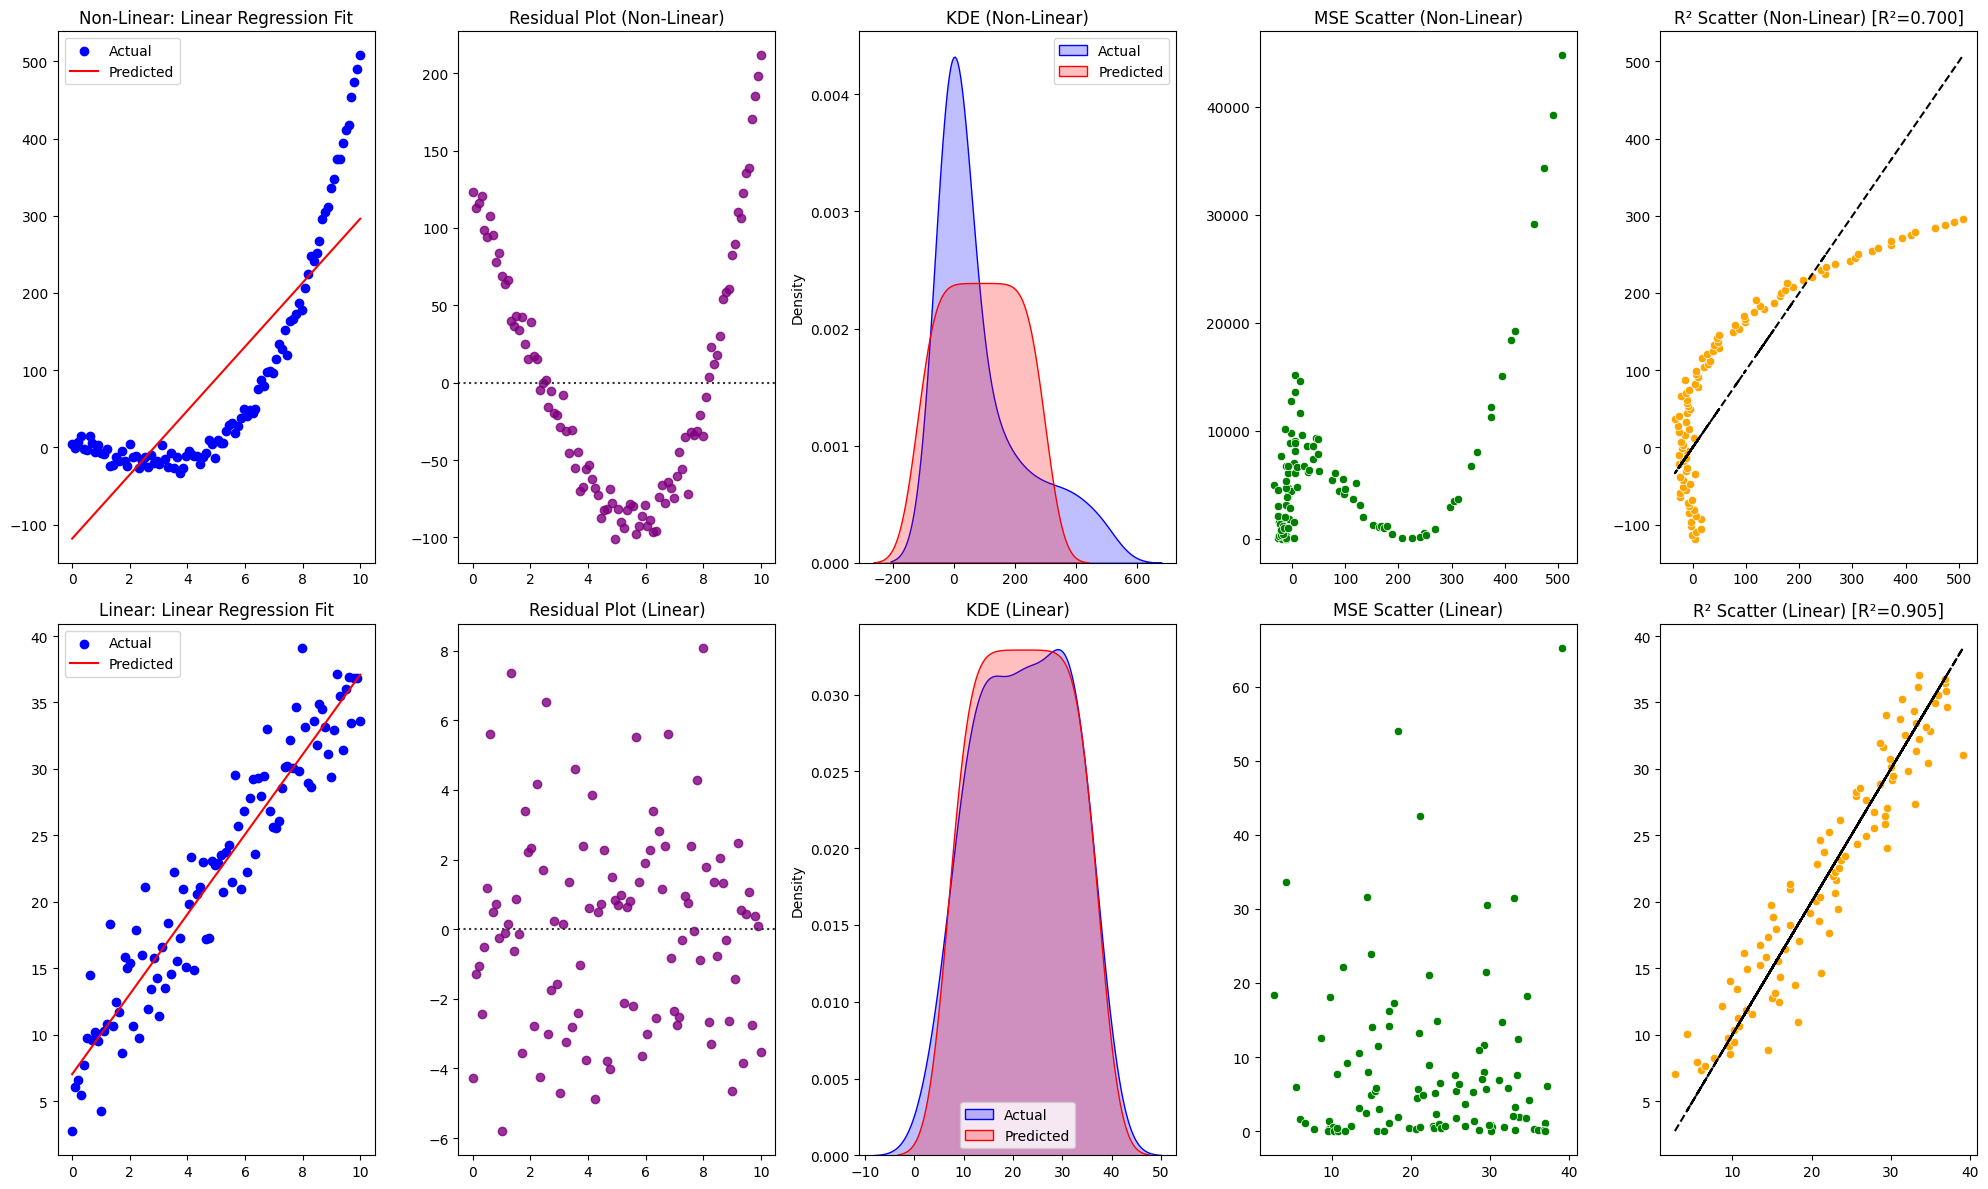

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seed for reproducibility
np.random.seed(42)

# Non-Linear Data
X_non_linear = np.linspace(0, 10, 100).reshape(-1, 1)
y_non_linear = X_non_linear**3 - 5*X_non_linear**2 + X_non_linear + np.random.normal(0, 10, X_non_linear.shape)  # Non-linear + noise

# Linear Data
X_linear = np.linspace(0, 10, 100).reshape(-1, 1)
y_linear = 3 * X_linear + 7 + np.random.normal(0, 3, X_linear.shape)  # y = 3X + 7 with noise

# Train models
model_non_linear = LinearRegression()
model_linear = LinearRegression()

model_non_linear.fit(X_non_linear, y_non_linear)
model_linear.fit(X_linear, y_linear)

# Predictions
y_pred_non_linear = model_non_linear.predict(X_non_linear)
y_pred_linear = model_linear.predict(X_linear)

# Residuals
residuals_non_linear = y_non_linear - y_pred_non_linear
residuals_linear = y_linear - y_pred_linear

# MSE
mse_non_linear = (y_non_linear - y_pred_non_linear) ** 2
mse_linear = (y_linear - y_pred_linear) ** 2

# R² Scores
r2_non_linear = r2_score(y_non_linear, y_pred_non_linear)
r2_linear = r2_score(y_linear, y_pred_linear)

# Create subplots (2 rows: one for each dataset)
fig, axes = plt.subplots(2, 5, figsize=(20, 12))

# -------- NON-LINEAR DATA --------
axes[0, 0].scatter(X_non_linear, y_non_linear, label="Actual", color="blue")
axes[0, 0].plot(X_non_linear, y_pred_non_linear, label="Predicted", color="red")
axes[0, 0].set_title("Non-Linear: Linear Regression Fit")
axes[0, 0].legend()

sns.residplot(x=X_non_linear.flatten(), y=residuals_non_linear.flatten(), ax=axes[0, 1], color="purple")
axes[0, 1].set_title("Residual Plot (Non-Linear)")

sns.kdeplot(y_non_linear.flatten(), ax=axes[0, 2], label="Actual", fill=True, color="blue")
sns.kdeplot(y_pred_non_linear.flatten(), ax=axes[0, 2], label="Predicted", fill=True, color="red")
axes[0, 2].set_title("KDE (Non-Linear)")
axes[0, 2].legend()

sns.scatterplot(x=y_non_linear.flatten(), y=mse_non_linear.flatten(), ax=axes[0, 3], color="green")
axes[0, 3].set_title("MSE Scatter (Non-Linear)")

sns.scatterplot(x=y_non_linear.flatten(), y=y_pred_non_linear.flatten(), ax=axes[0, 4], color="orange")
axes[0, 4].plot(y_non_linear.flatten(), y_non_linear.flatten(), color="black", linestyle="dashed")
axes[0, 4].set_title(f"R² Scatter (Non-Linear) [R²={r2_non_linear:.3f}]")

# -------- LINEAR DATA --------
axes[1, 0].scatter(X_linear, y_linear, label="Actual", color="blue")
axes[1, 0].plot(X_linear, y_pred_linear, label="Predicted", color="red")
axes[1, 0].set_title("Linear: Linear Regression Fit")
axes[1, 0].legend()

sns.residplot(x=X_linear.flatten(), y=residuals_linear.flatten(), ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Residual Plot (Linear)")

sns.kdeplot(y_linear.flatten(), ax=axes[1, 2], label="Actual", fill=True, color="blue")
sns.kdeplot(y_pred_linear.flatten(), ax=axes[1, 2], label="Predicted", fill=True, color="red")
axes[1, 2].set_title("KDE (Linear)")
axes[1, 2].legend()

sns.scatterplot(x=y_linear.flatten(), y=mse_linear.flatten(), ax=axes[1, 3], color="green")
axes[1, 3].set_title("MSE Scatter (Linear)")

sns.scatterplot(x=y_linear.flatten(), y=y_pred_linear.flatten(), ax=axes[1, 4], color="orange")
axes[1, 4].plot(y_linear.flatten(), y_linear.flatten(), color="black", linestyle="dashed")
axes[1, 4].set_title(f"R² Scatter (Linear) [R²={r2_linear:.3f}]")

# Adjust layout
plt.tight_layout()
plt.show()
